#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')

#### Import dataset

In [12]:
epf_col_names = ["SE3(+24)","SE3","Air Temperature SE3(-7)","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday","Date","Year","Month","Day","Air Temperature SE3","Diesel","Air Temperature SE1(-10)","Air Temperature SE1(-11)","Air Temperature SE1(-12)","Air Temperature SE1(-13)","Air Temperature SE1(-14)","Air Temperature SE2(-9)","Air Temperature SE2(-10)","Air Temperature SE2(-11)","Air Temperature SE2(-12)","Air Temperature SE2(-13)","Air Temperature SE2(-14)","Air Temperature SE2(-15)","Air Temperature SE3(-8)","Air Temperature SE3(-9)","Air Temperature SE3(-10)","Air Temperature SE3(-11)","Air Temperature SE3(-12)","Air Temperature SE3(-13)","Air Temperature SE3(-14)","Air Temperature SE3(-15)","Air Temperature SE3(-16)","Air Temperature SE4(-8)","Air Temperature SE4(-9)","Air Temperature SE4(-10)","Air Temperature SE4(-11)","Air Temperature SE4(-12)","Air Temperature SE4(-13)","Air Temperature SE4(-14)","Air Temperature SE4(-15)","Air Temperature SE4(-16)"]
epf = pd.read_csv("Actual_BestFeatures1.csv", skiprows = 1, header = None, names = epf_col_names)

# Show first 10 rows
epf.head(10)

,SE3(+24),SE3,Air Temperature SE3(-7),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,Air Temperature SE3(-16),Air Temperature SE4(-8),Air Temperature SE4(-9),Air Temperature SE4(-10),Air Temperature SE4(-11),Air Temperature SE4(-12),Air Temperature SE4(-13),Air Temperature SE4(-14),Air Temperature SE4(-15),Air Temperature SE4(-16)
0,31.36,27.53,0.000000,0,0,0,0,1,0,0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30.32,26.47,0.000000,0,0,0,0,1,0,0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30.04,26.03,0.000000,0,0,0,0,1,0,0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28.61,28.13,0.000000,0,0,0,0,1,0,0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28.26,29.92,0.000000,0,0,0,0,1,0,0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,29.22,30.79,0.000000,0,0,0,0,1,0,0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,28.16,31.72,0.000000,0,0,0,0,1,0,0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,29.86,32.33,-0.246753,0,0,0,0,1,0,0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,30.98,32.55,-0.123377,0,0,0,0,1,0,0,...,0.0,2.215,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,31.46,32.42,-0.075325,0,0,0,0,1,0,0,...,0.0,2.460,2.215,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Convert data to correct format

In [13]:
epf['Date'] = pd.to_datetime(epf['Date'])

# Set date as dataset index
epf = epf.set_index('Date')

# Set new column names
epf_col_names = ["SE3(+24)","SE3","Air Temperature SE3(-7)","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday","Year","Month","Day","Air Temperature SE3","Diesel","Air Temperature SE1(-10)","Air Temperature SE1(-11)","Air Temperature SE1(-12)","Air Temperature SE1(-13)","Air Temperature SE1(-14)","Air Temperature SE2(-9)","Air Temperature SE2(-10)","Air Temperature SE2(-11)","Air Temperature SE2(-12)","Air Temperature SE2(-13)","Air Temperature SE2(-14)","Air Temperature SE2(-15)","Air Temperature SE3(-8)","Air Temperature SE3(-9)","Air Temperature SE3(-10)","Air Temperature SE3(-11)","Air Temperature SE3(-12)","Air Temperature SE3(-13)","Air Temperature SE3(-14)","Air Temperature SE3(-15)","Air Temperature SE3(-16)","Air Temperature SE4(-8)","Air Temperature SE4(-9)","Air Temperature SE4(-10)","Air Temperature SE4(-11)","Air Temperature SE4(-12)","Air Temperature SE4(-13)","Air Temperature SE4(-14)","Air Temperature SE4(-15)","Air Temperature SE4(-16)"]

#### Prepare data

In [14]:
# Separate columns between attributes and prices
X, Y = epf.iloc[:,1:].values, epf.iloc[:,:1].values

#### Divide the data between training and testing

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = False)

#### Perform training

In [16]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

#### Perform testing

In [17]:
Y_predict = linear_regressor.predict(X_test)
Y_predict = pd.DataFrame(Y_predict, columns = ['Predicted'])

#### Evaluation

In [18]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, Y_predict))
print("Mean Absolute Percentage Error:", metrics.mean_absolute_percentage_error(Y_test, Y_predict))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))

Mean Absolute Error: 41.19088689980566
Mean Absolute Percentage Error: 1721858005307377.2
Root Mean Squared Error: 61.68278856317782


#### Plot chart

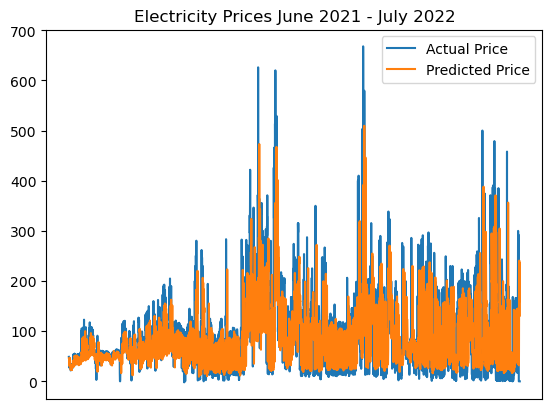

In [19]:
fig = plt.figure()

plt.plot(Y_test)
plt.plot(Y_predict)
plt.grid(False)
plt.xticks([])

plt.title('Electricity Prices June 2021 - July 2022')

plt.legend(['Actual Price', 'Predicted Price'])

#### Rolling windows

In [20]:
epf_7d_rol = epf[epf_col_names].rolling(window = 168, center = True).mean()
epf_365d_rol = epf[epf_col_names].rolling(window = 8760, center = True).mean()

Text(0.5, 1.0, 'Trends in Electricity Price')

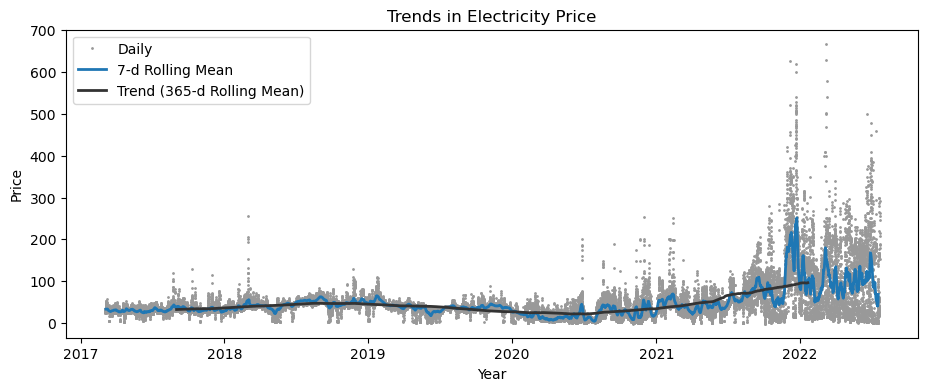

In [21]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(epf['SE3'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(epf_7d_rol['SE3'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(epf_365d_rol['SE3'], color='0.2', linewidth=2, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_title('Trends in Electricity Price')

#### De-trending time series

In [22]:
# differencing: value at time (t) = original value at time (t) - original value at time (t-1)

# creating the first order differencing data
epf_first_order_diff = epf[epf_col_names].diff()

In [23]:
epf_first_order_diff_7d_rol = epf_first_order_diff[epf_col_names].rolling(window = 168, center = True).mean()
epf_first_order_diff_365d_rol = epf_first_order_diff[epf_col_names].rolling(window = 8760, center = True).mean()

Text(0.5, 1.0, 'Trends in Electricity Price')

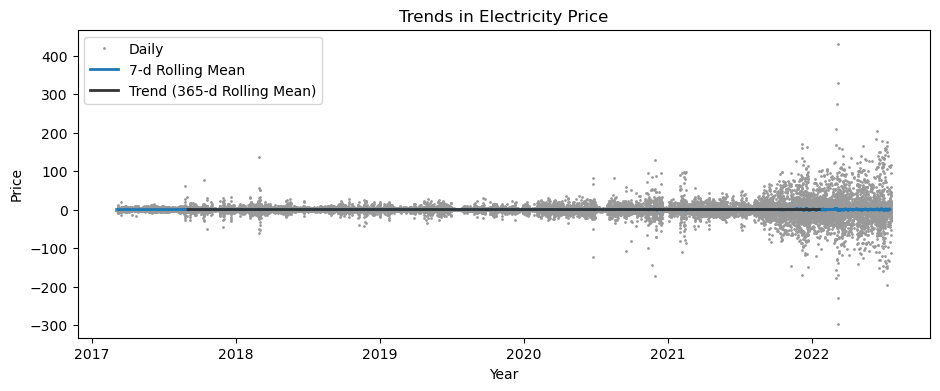

In [24]:
fig, ax = plt.subplots(figsize = (11,4))
# plotting daily data
ax.plot(epf_first_order_diff['SE3'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
# plotting 7-day rolling data
ax.plot(epf_first_order_diff_7d_rol['SE3'], linewidth=2, label='7-d Rolling Mean')
# plotting annual rolling data
ax.plot(epf_first_order_diff_365d_rol['SE3'], color='0.2', linewidth=2, label='Trend (365-d Rolling Mean)')
# Beautification of plot
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_title('Trends in Electricity Price')

#### Seasonality

<AxesSubplot:xlabel='Date'>

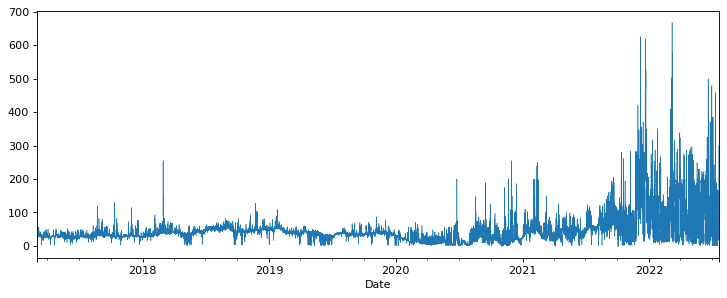

In [25]:
plt.figure(figsize=(11,4), dpi= 80)
epf['SE3'].plot(linewidth = 0.5)

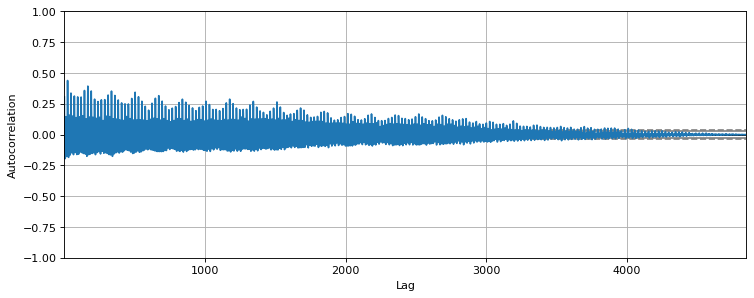

In [26]:
# Plotting autocorrelation
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(epf_first_order_diff.loc['2022-01': '2022-07', 'SE3']);

In [27]:
# Remove null first row
epf_first_order_diff = epf_first_order_diff.tail(-1)

In [28]:
epf_first_order_diff.head(10)

,SE3(+24),SE3,Air Temperature SE3(-7),Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,...,Air Temperature SE3(-16),Air Temperature SE4(-8),Air Temperature SE4(-9),Air Temperature SE4(-10),Air Temperature SE4(-11),Air Temperature SE4(-12),Air Temperature SE4(-13),Air Temperature SE4(-14),Air Temperature SE4(-15),Air Temperature SE4(-16)
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-03 01:00:00,-1.04,-1.06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-03 02:00:00,-0.28,-0.44,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-03 03:00:00,-1.43,2.10,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-03 04:00:00,-0.35,1.79,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-03 05:00:00,0.96,0.87,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-03 06:00:00,-1.06,0.93,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-03 07:00:00,1.70,0.61,-0.246753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-03 08:00:00,1.12,0.22,0.123377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.215,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2017-03-03 09:00:00,0.48,-0.13,0.048052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.245,2.215,0.000,0.0,0.0,0.0,0.0,0.0,0.0


#### Nested Cross-Validation

In [29]:
def nested_cross_validation(df, n_splits = 3):
    
    trainTestSplit = TimeSeriesSplit(n_splits+1).split(df)
    next(trainTestSplit) #Skip the first fold
    
    for trainCvIndices, testIndices in trainTestSplit:
        # First, we split Train + CV and Test
        XTrainCv, yTrainCv = df.iloc[trainCvIndices, 1:], df.iloc[trainCvIndices, :1]
        XTest, yTest       = df.iloc[testIndices, 1:]   , df.iloc[testIndices, :1]
    
        # Then, we build a list of the form [ ( [...Train Indices...], [...CV Indices...]  )]
        testLength = len(XTest)
        trainCvSplit = [(list(range(trainCvIndices[0],trainCvIndices[-testLength])),
                     list(range(trainCvIndices[-testLength],trainCvIndices[-1]+1)))]
    
        # Printing date ranges
        print("Training:"           , XTrainCv.index[0].date(), "--", XTrainCv.index[-testLength-1].date(),
              ", Cv:"     , XTrainCv.index[-testLength].date(), "--", XTrainCv.index[-1].date(),
              ", Test:"                , XTest.index[0].date(), "--", XTest.index[-1].date())
        
        modelCV = RidgeCV(cv = trainCvSplit).fit(XTrainCv,yTrainCv)
        YPredict = modelCV.predict(XTest)
        YPredict = pd.DataFrame(YPredict, columns = ['Predicted'])
        
        print("    Mean Absolute Error:", metrics.mean_absolute_error(yTest, YPredict))
        print("    Mean Absolute Percentage Error:", metrics.mean_absolute_percentage_error(yTest, YPredict))
        print("    Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(yTest, YPredict)))
    
    return yTest, YPredict

##### Un-season Dataset

In [30]:
yTest_epf, YPredict_epf = nested_cross_validation(epf, n_splits = 3)

Training: 2017-03-03 -- 2018-03-31 , Cv: 2018-03-31 -- 2019-04-28 , Test: 2019-04-28 -- 2020-05-26
    Mean Absolute Error: 9.604531526683475
    Mean Absolute Percentage Error: 1.25506452572727
    Root Mean Squared Error: 11.702577731119584
Training: 2017-03-03 -- 2019-04-28 , Cv: 2019-04-28 -- 2020-05-26 , Test: 2020-05-26 -- 2021-06-23
    Mean Absolute Error: 10.336430734132733
    Mean Absolute Percentage Error: 7512017948856.56
    Root Mean Squared Error: 16.915478638080423
Training: 2017-03-03 -- 2020-05-26 , Cv: 2020-05-26 -- 2021-06-23 , Test: 2021-06-23 -- 2022-07-21
    Mean Absolute Error: 41.19592207586426
    Mean Absolute Percentage Error: 1722026189455917.2
    Root Mean Squared Error: 61.68769285169021


##### Un-season + Un-trend Dataset

In [42]:
yTest_diff, YPredict_diff = nested_cross_validation(epf_first_order_diff, n_splits = 3)

Training: 2017-03-03 -- 2018-03-31 , Cv: 2018-03-31 -- 2019-04-28 , Test: 2019-04-28 -- 2020-05-26
    Mean Absolute Error: 1.6589339748045004
    Mean Absolute Percentage Error: 16249709678430.424
    Root Mean Squared Error: 3.3450922773769234
Training: 2017-03-03 -- 2019-04-28 , Cv: 2019-04-28 -- 2020-05-26 , Test: 2020-05-26 -- 2021-06-23
    Mean Absolute Error: 3.5968851451165302
    Mean Absolute Percentage Error: 30114397104883.15
    Root Mean Squared Error: 8.278901760331832
Training: 2017-03-03 -- 2020-05-26 , Cv: 2020-05-26 -- 2021-06-23 , Test: 2021-06-23 -- 2022-07-21
    Mean Absolute Error: 12.643356147889227
    Mean Absolute Percentage Error: 191428186185599.56
    Root Mean Squared Error: 24.126560662926032


#### Plot chart

##### Un-season Dataset

In [34]:
yTest_epf = yTest_epf.reset_index()['SE3(+24)']

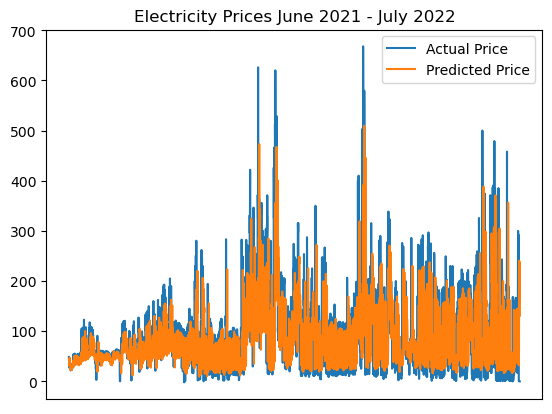

In [35]:
fig = plt.figure()

plt.plot(yTest_epf)
plt.plot(YPredict_epf)
plt.grid(False)
plt.xticks([])

plt.title('Electricity Prices June 2021 - July 2022')
plt.legend(['Actual Price', 'Predicted Price'])

##### Un-season + Un-trend Dataset

In [47]:
yTest_diff

,SE3(+24)
Date,
2021-06-23 15:00:00,-0.29
2021-06-23 16:00:00,-0.65
2021-06-23 17:00:00,-0.86
2021-06-23 18:00:00,-2.18
2021-06-23 19:00:00,-6.25
...,...
2022-07-21 19:00:00,0.00
2022-07-21 20:00:00,0.00
2022-07-21 21:00:00,0.00


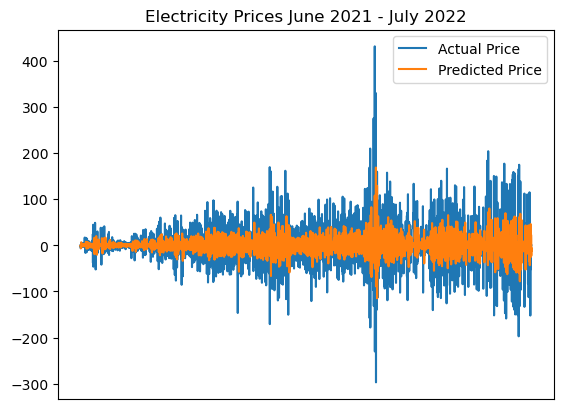

In [48]:
yTest_diff = yTest_diff.reset_index()['SE3(+24)']

fig = plt.figure()

plt.plot(yTest_diff)
plt.plot(YPredict_diff)
plt.grid(False)
plt.xticks([])

plt.title('Electricity Prices June 2021 - July 2022')
plt.legend(['Actual Price', 'Predicted Price'])

In [ ]:
#YPredict_diff = YPredict_diff.reset_index()['SE3']

In [36]:
x, x_diff = epf['SE3(+24)'].iloc[0], YPredict_diff['Predicted']
YPredict_undiff = np.r_[x, x_diff].cumsum().astype(float)

In [37]:
YPredict_undiff = YPredict_undiff[1:]

In [38]:
print("Mean Absolute Error:", metrics.mean_absolute_error(yTest_epf, YPredict_undiff))
print("Mean Absolute Percentage Error:", metrics.mean_absolute_percentage_error(yTest_epf, YPredict_undiff))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(yTest_epf, YPredict_undiff)))

Mean Absolute Error: 51.13488747001093
Mean Absolute Percentage Error: 868446922225078.1
Root Mean Squared Error: 71.77363899025323


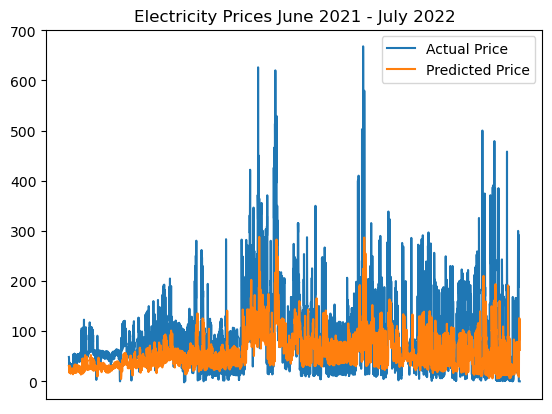

In [39]:
fig = plt.figure()

plt.plot(yTest_epf)
plt.plot(YPredict_undiff)
plt.grid(False)
plt.xticks([])

plt.title('Electricity Prices June 2021 - July 2022')
plt.legend(['Actual Price', 'Predicted Price'])